In [1]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url='https://www.kaggle.com/datasets/splcher/animefacedataset'
od.download(dataset_url)

In [13]:
import os
images_path='./animefacedataset'
print(os.listdir(images_path))
print(os.listdir(images_path+'/images')[:10])

['images']
['47145_2014.jpg', '43127_2013.jpg', '53366_2016.jpg', '45929_2014.jpg', '6624_2003.jpg', '44241_2013.jpg', '13381_2005.jpg', '12414_2005.jpg', '18293_2007.jpg', '32228_2011.jpg']


In [16]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [25]:
image_size=64
batch_size=128
stats=(0.5,0.5,0.5), (0.5,0.5,0.5)

In [29]:
transform = T.Compose([T.Resize(image_size),T.ToTensor(),
                       T.Normalize(*stats)])

In [19]:
train_data = ImageFolder(root=images_path,
                         transform=transform)

In [30]:
train_loader = DataLoader(dataset=train_data,
               batch_size=batch_size, shuffle=True)

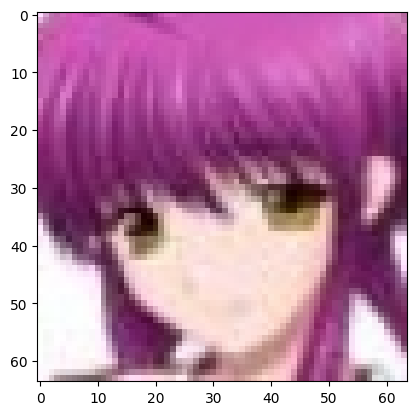

In [35]:
import matplotlib.pyplot as plt
image3, _= train_data[3]
plt.imshow(image3.permute(1,2,0)*0.5+0.5)
plt.show()

In [41]:
def show_images(imgs):
  for i in range(32):
    ax = plt.subplot(4, 8, i + 1)
    plt.imshow(imgs[i].permute(1,2,0)/2+0.5)
    plt.xticks([])
    plt.yticks([])
  plt.subplots_adjust(hspace=-0.6)
  plt.show()

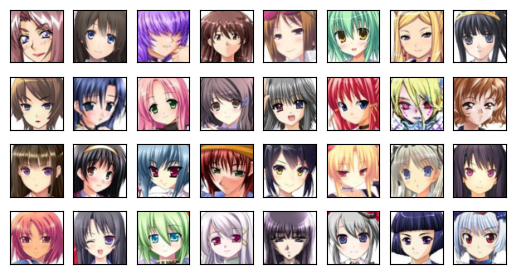

In [45]:
imgs, _ = next(iter(train_loader))
show_images(imgs)

# Neuer Abschnitt